In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


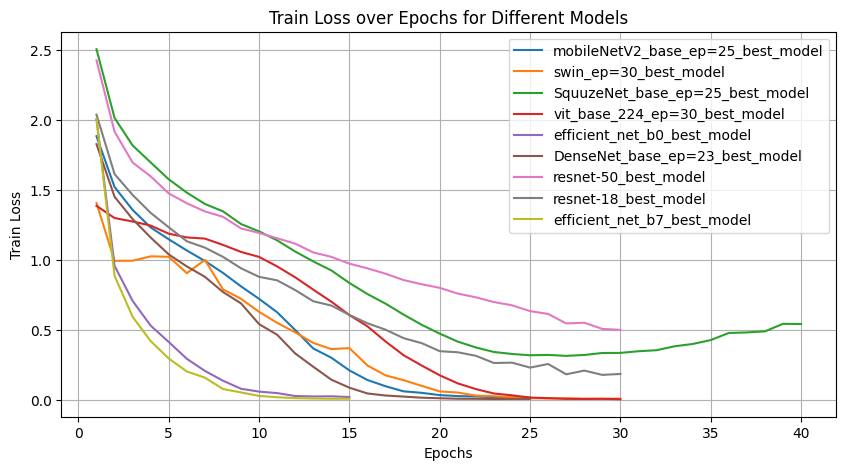

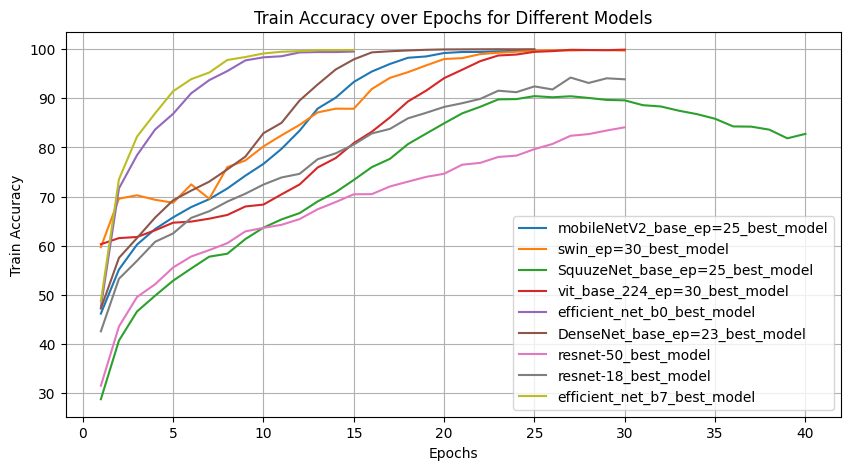

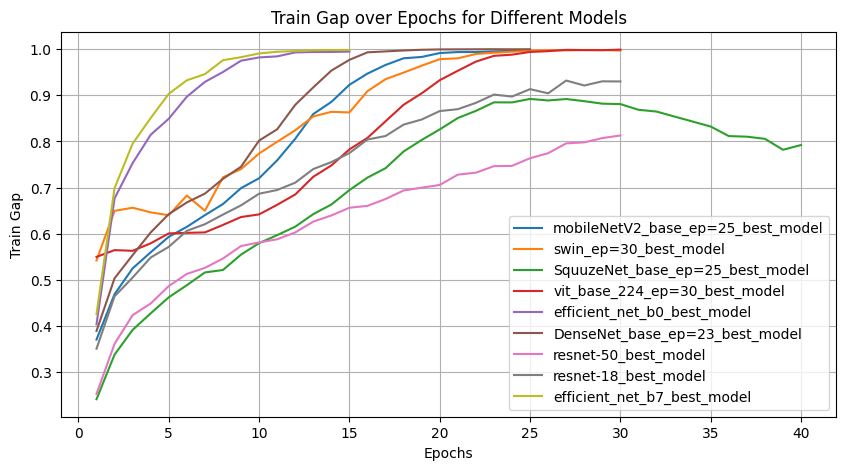

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Path to the directory containing the log files
directory_path = '/content/drive/MyDrive/cs444-final-project/project/models/baselines/train_logs'

# Lists to store data
train_loss_data = []
train_accuracy_data = []
train_gap_data = []
model_names = []

# Reading each file in the directory
for file_name in os.listdir(directory_path):
    if file_name.endswith('.json'):  # Assuming all log files end with '.log'
        model_name = file_name[:-5]  # Remove the '.log' part for the model name
        model_names.append(model_name)

        # Construct the full file path
        file_path = os.path.join(directory_path, file_name)

        # if file_name.startswith('resnet'):
        #     with open(file_path, 'r') as file:
        #         data = json.load(file)

        #     # Modify the data as needed
        #     data['train_accuracy'] = [x * 100 for x in data['train_accuracy']]

        #     # Then, open the file in write mode and write the modified data
        #     with open(file_path, 'w') as file:
        #         json.dump(data, file)

        # Open and load the JSON data
        with open(file_path, 'r') as file:

            data = json.load(file)

            # Append the data from this file to the lists
            train_loss_data.append(data['train_loss'])
            train_accuracy_data.append(data['train_accuracy'])
            train_gap_data.append(data['train_gap'])

# Function to plot data
def plot_metric(metric_data, metric_name):
    plt.figure(figsize=(10, 5))
    for i, model_data in enumerate(metric_data):
        # Assuming each model may have different epoch lengths
        epochs = range(1, len(model_data) + 1)
        plt.plot(epochs, model_data, label=model_names[i])

    plt.title(f'{metric_name} over Epochs for Different Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting each metric
plot_metric(train_loss_data, 'Train Loss')
plot_metric(train_accuracy_data, 'Train Accuracy')
plot_metric(train_gap_data, 'Train Gap')


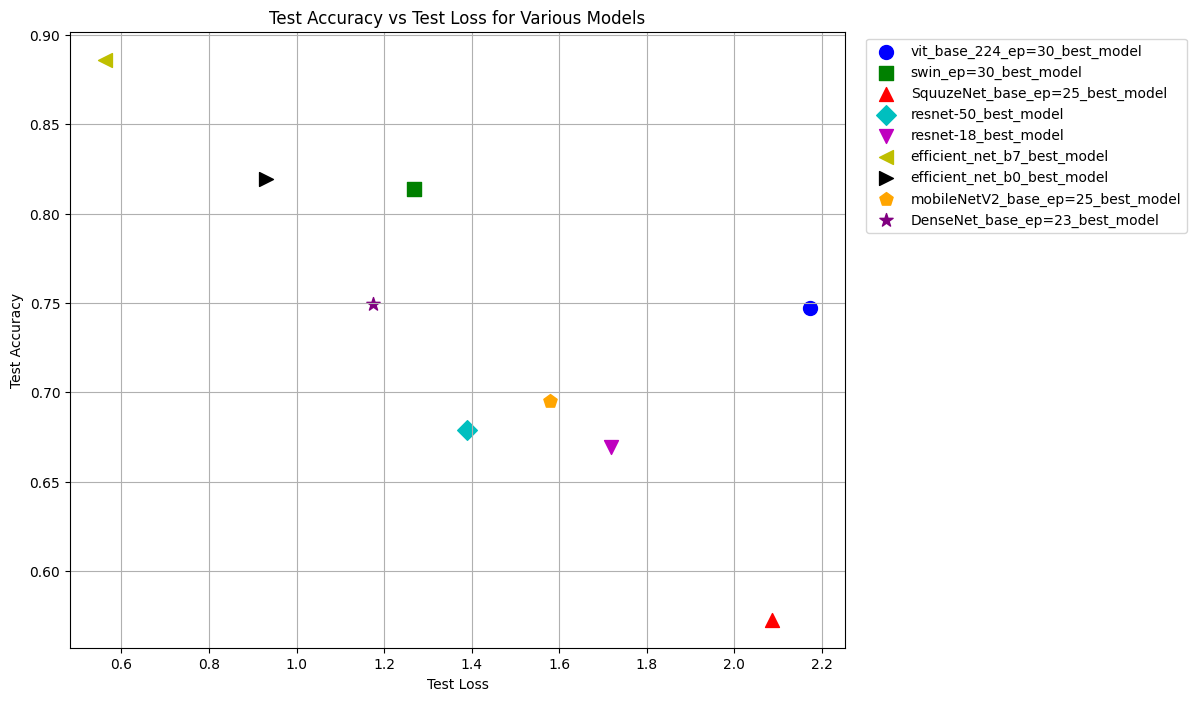

In [ ]:
import json
import matplotlib.pyplot as plt

# Path to the directory containing the log files
file_path = '/content/drive/MyDrive/cs444-final-project/project/models/baselines/train_logs/Model_Test_Acc_vs_Test_Loss.txt'

# Load the data from a JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Prepare the data for plotting
test_losses = []
test_accuracies = []
labels = []

for model, metrics in data.items():
    test_losses.append(metrics['Test Loss'])
    # Handle both keys 'Test Accuracy' and 'Accuracy'
    test_accuracies.append(metrics.get('Test Accuracy') or metrics.get('Accuracy'))
    labels.append(model)

# Define colors and markers
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# Create the scatter plot
plt.figure(figsize=(10, 8))
for i, label in enumerate(labels):
    plt.scatter(test_losses[i], test_accuracies[i], label=label, color=colors[i % len(colors)], marker=markers[i % len(markers)], s=100)

plt.xlabel('Test Loss')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Test Loss for Various Models')
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1))
plt.grid(True)
plt.show()

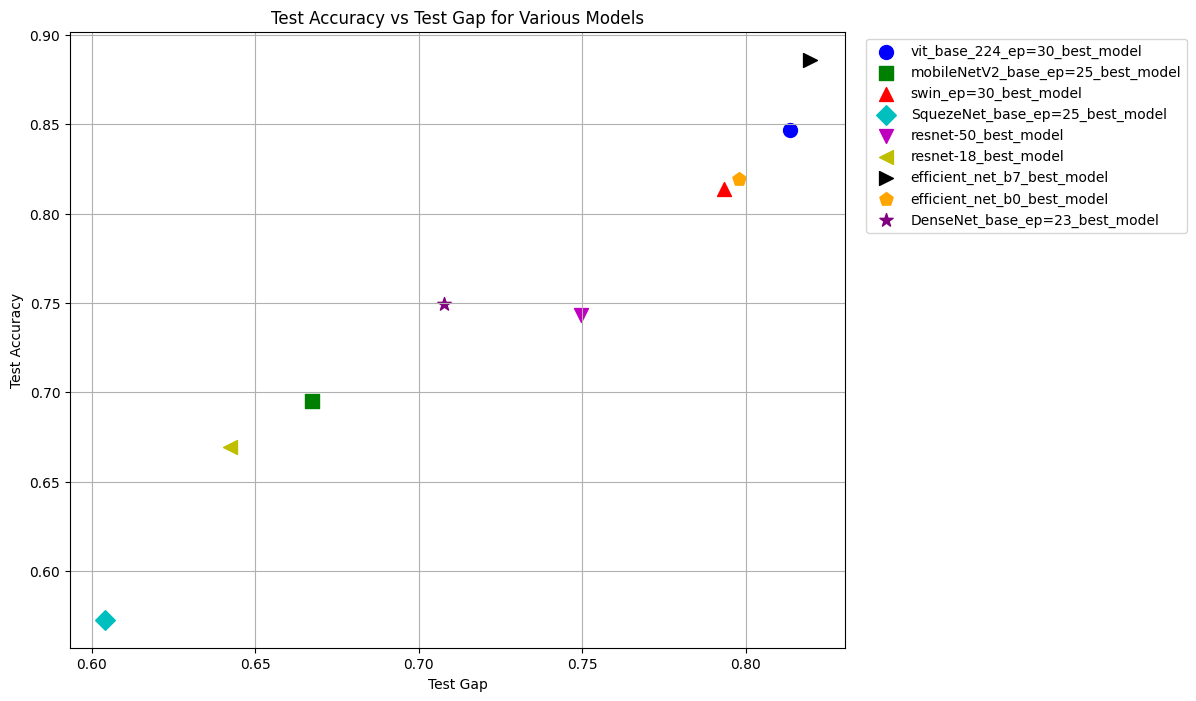

In [ ]:
import json
import matplotlib.pyplot as plt

# Path to the directory containing the log files
file_path = '/content/drive/MyDrive/cs444-final-project/project/models/baselines/train_logs/Model_Test_Acc_vs_Test_Gap.txt'

# Load the data from a JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Prepare the data for plotting
test_Gaps = []
test_accuracies = []
labels = []

for model, metrics in data.items():
    test_Gaps.append(metrics['Test Gap'])
    # Handle both keys 'Test Accuracy' and 'Accuracy'
    test_accuracies.append(metrics.get('Test Accuracy') or metrics.get('Accuracy'))
    labels.append(model)

# Define colors and markers
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# Create the scatter plot
plt.figure(figsize=(10, 8))
for i, label in enumerate(labels):
    plt.scatter(test_Gaps[i], test_accuracies[i], label=label, color=colors[i % len(colors)], marker=markers[i % len(markers)], s=100)

plt.xlabel('Test Gap')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Test Gap for Various Models')
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1))
plt.grid(True)
plt.show()